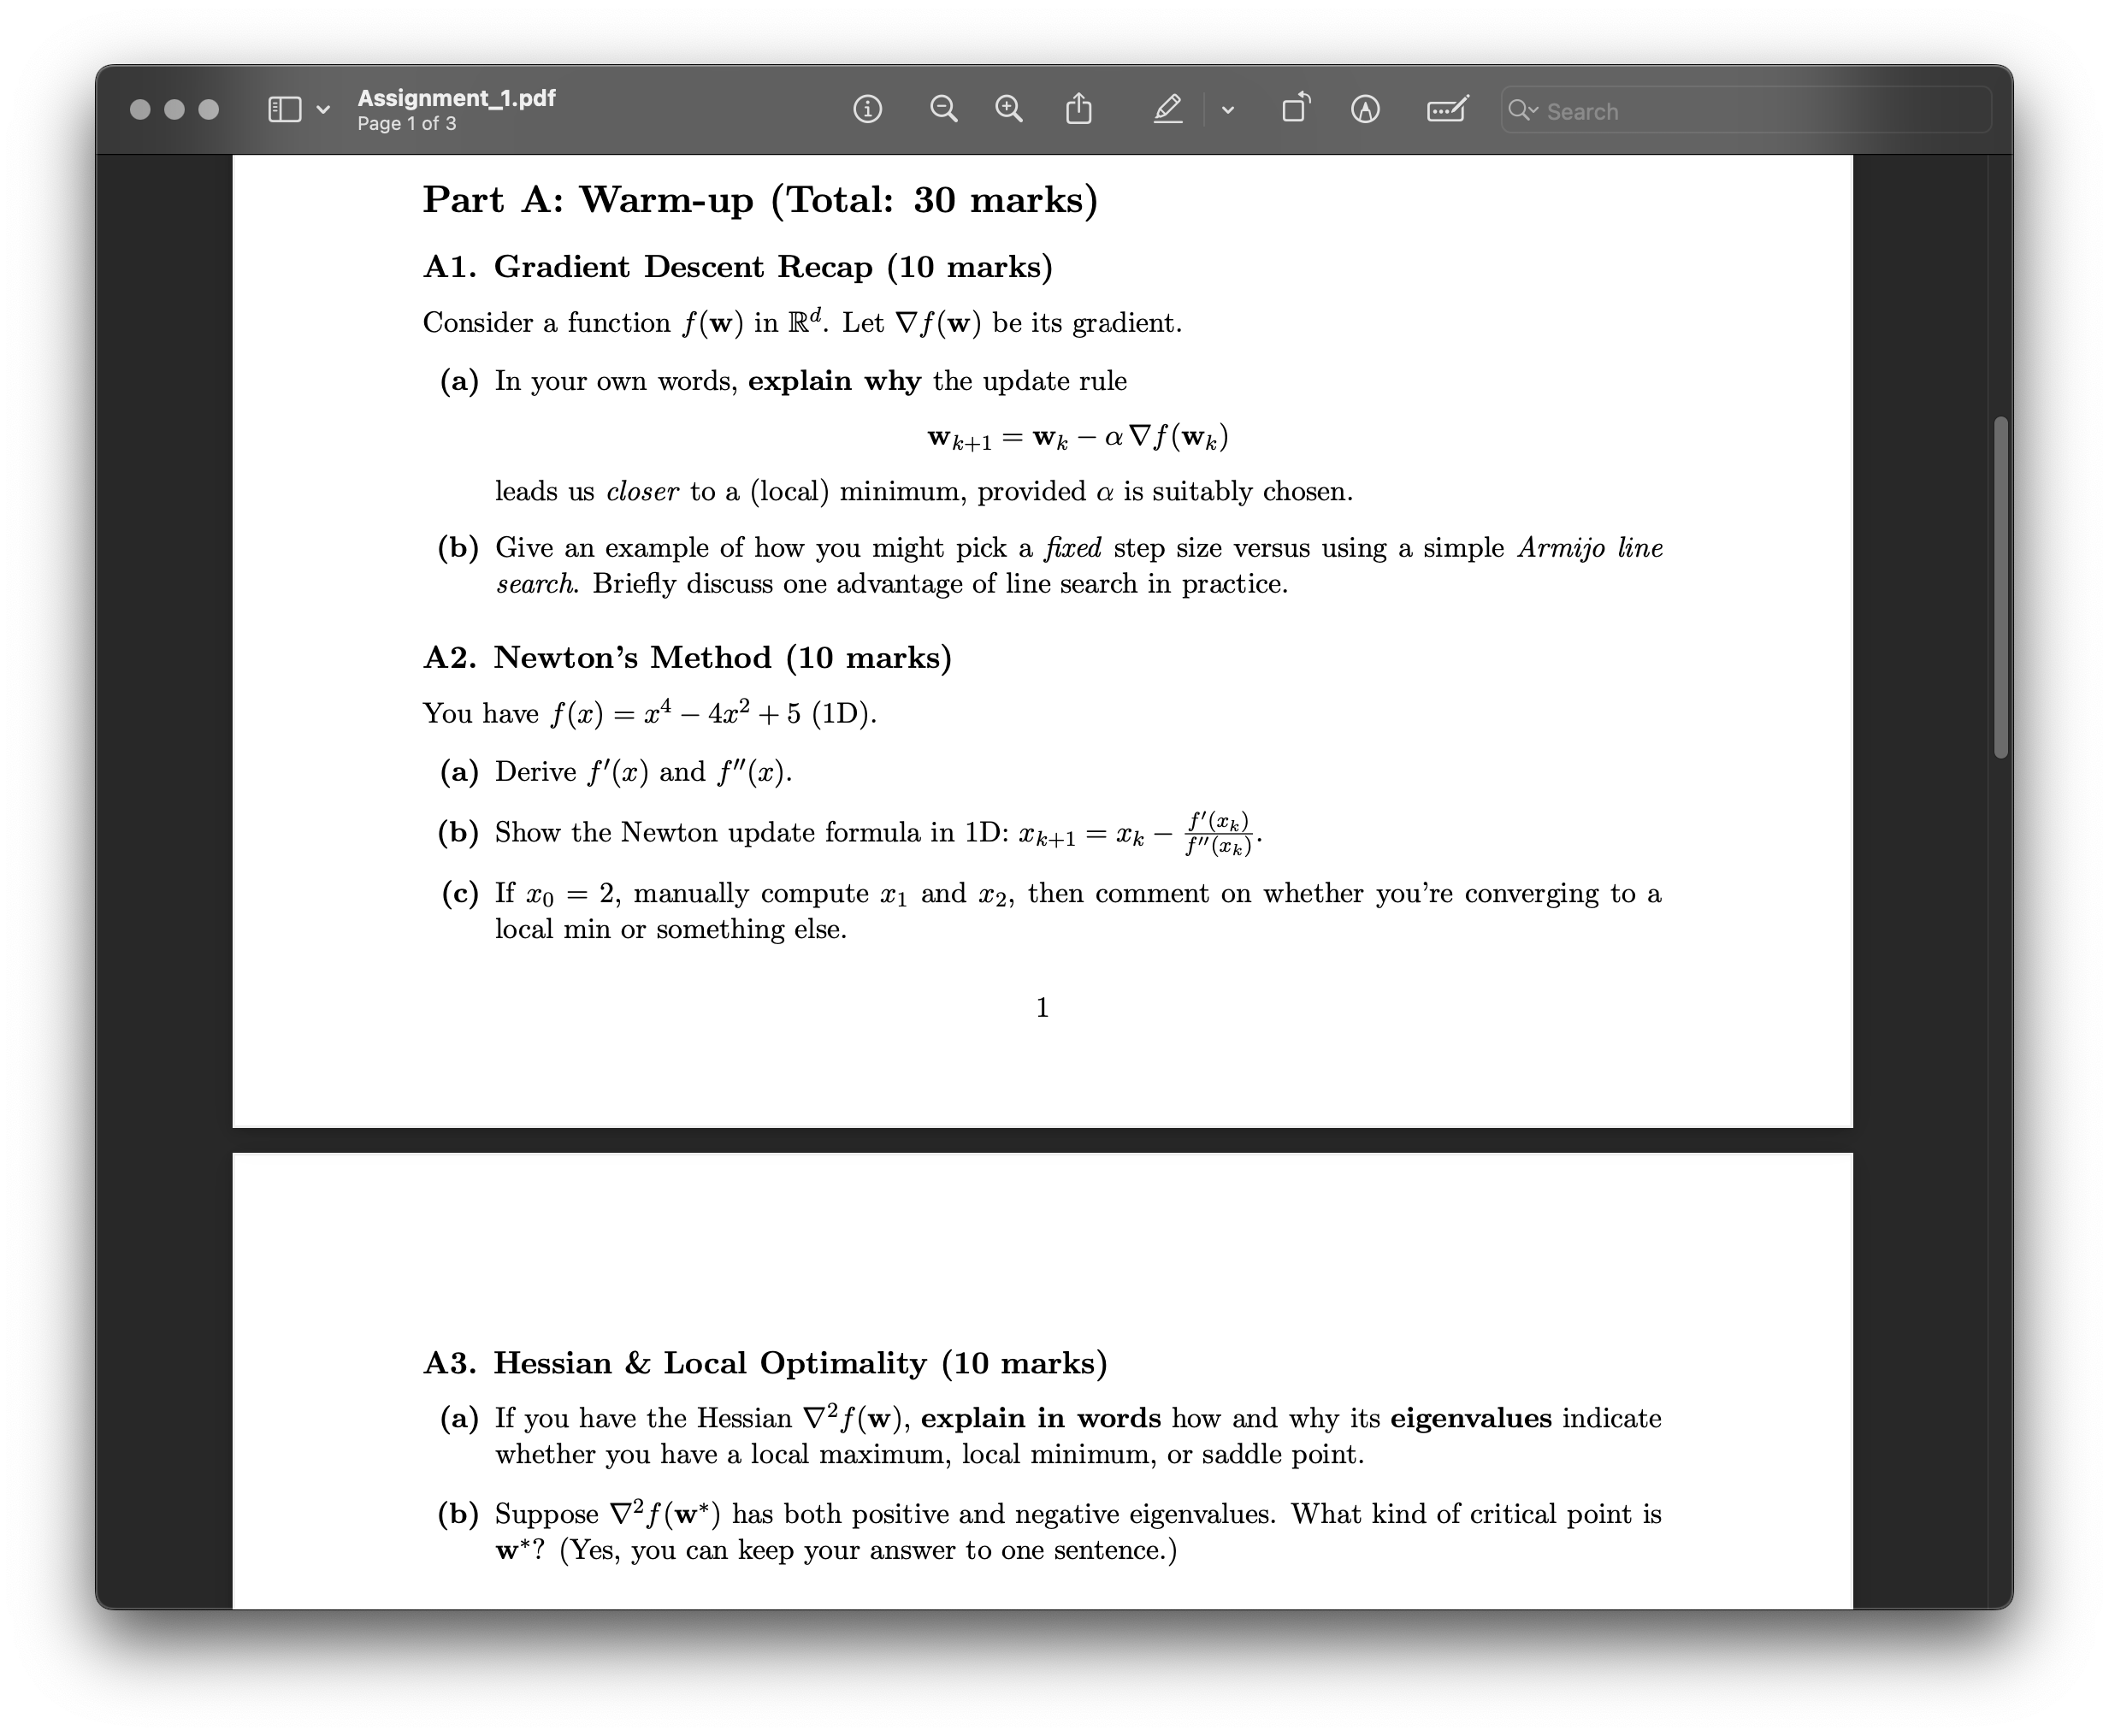

[Part A](../../../Downloads/ODSM_Part_A.pdf)

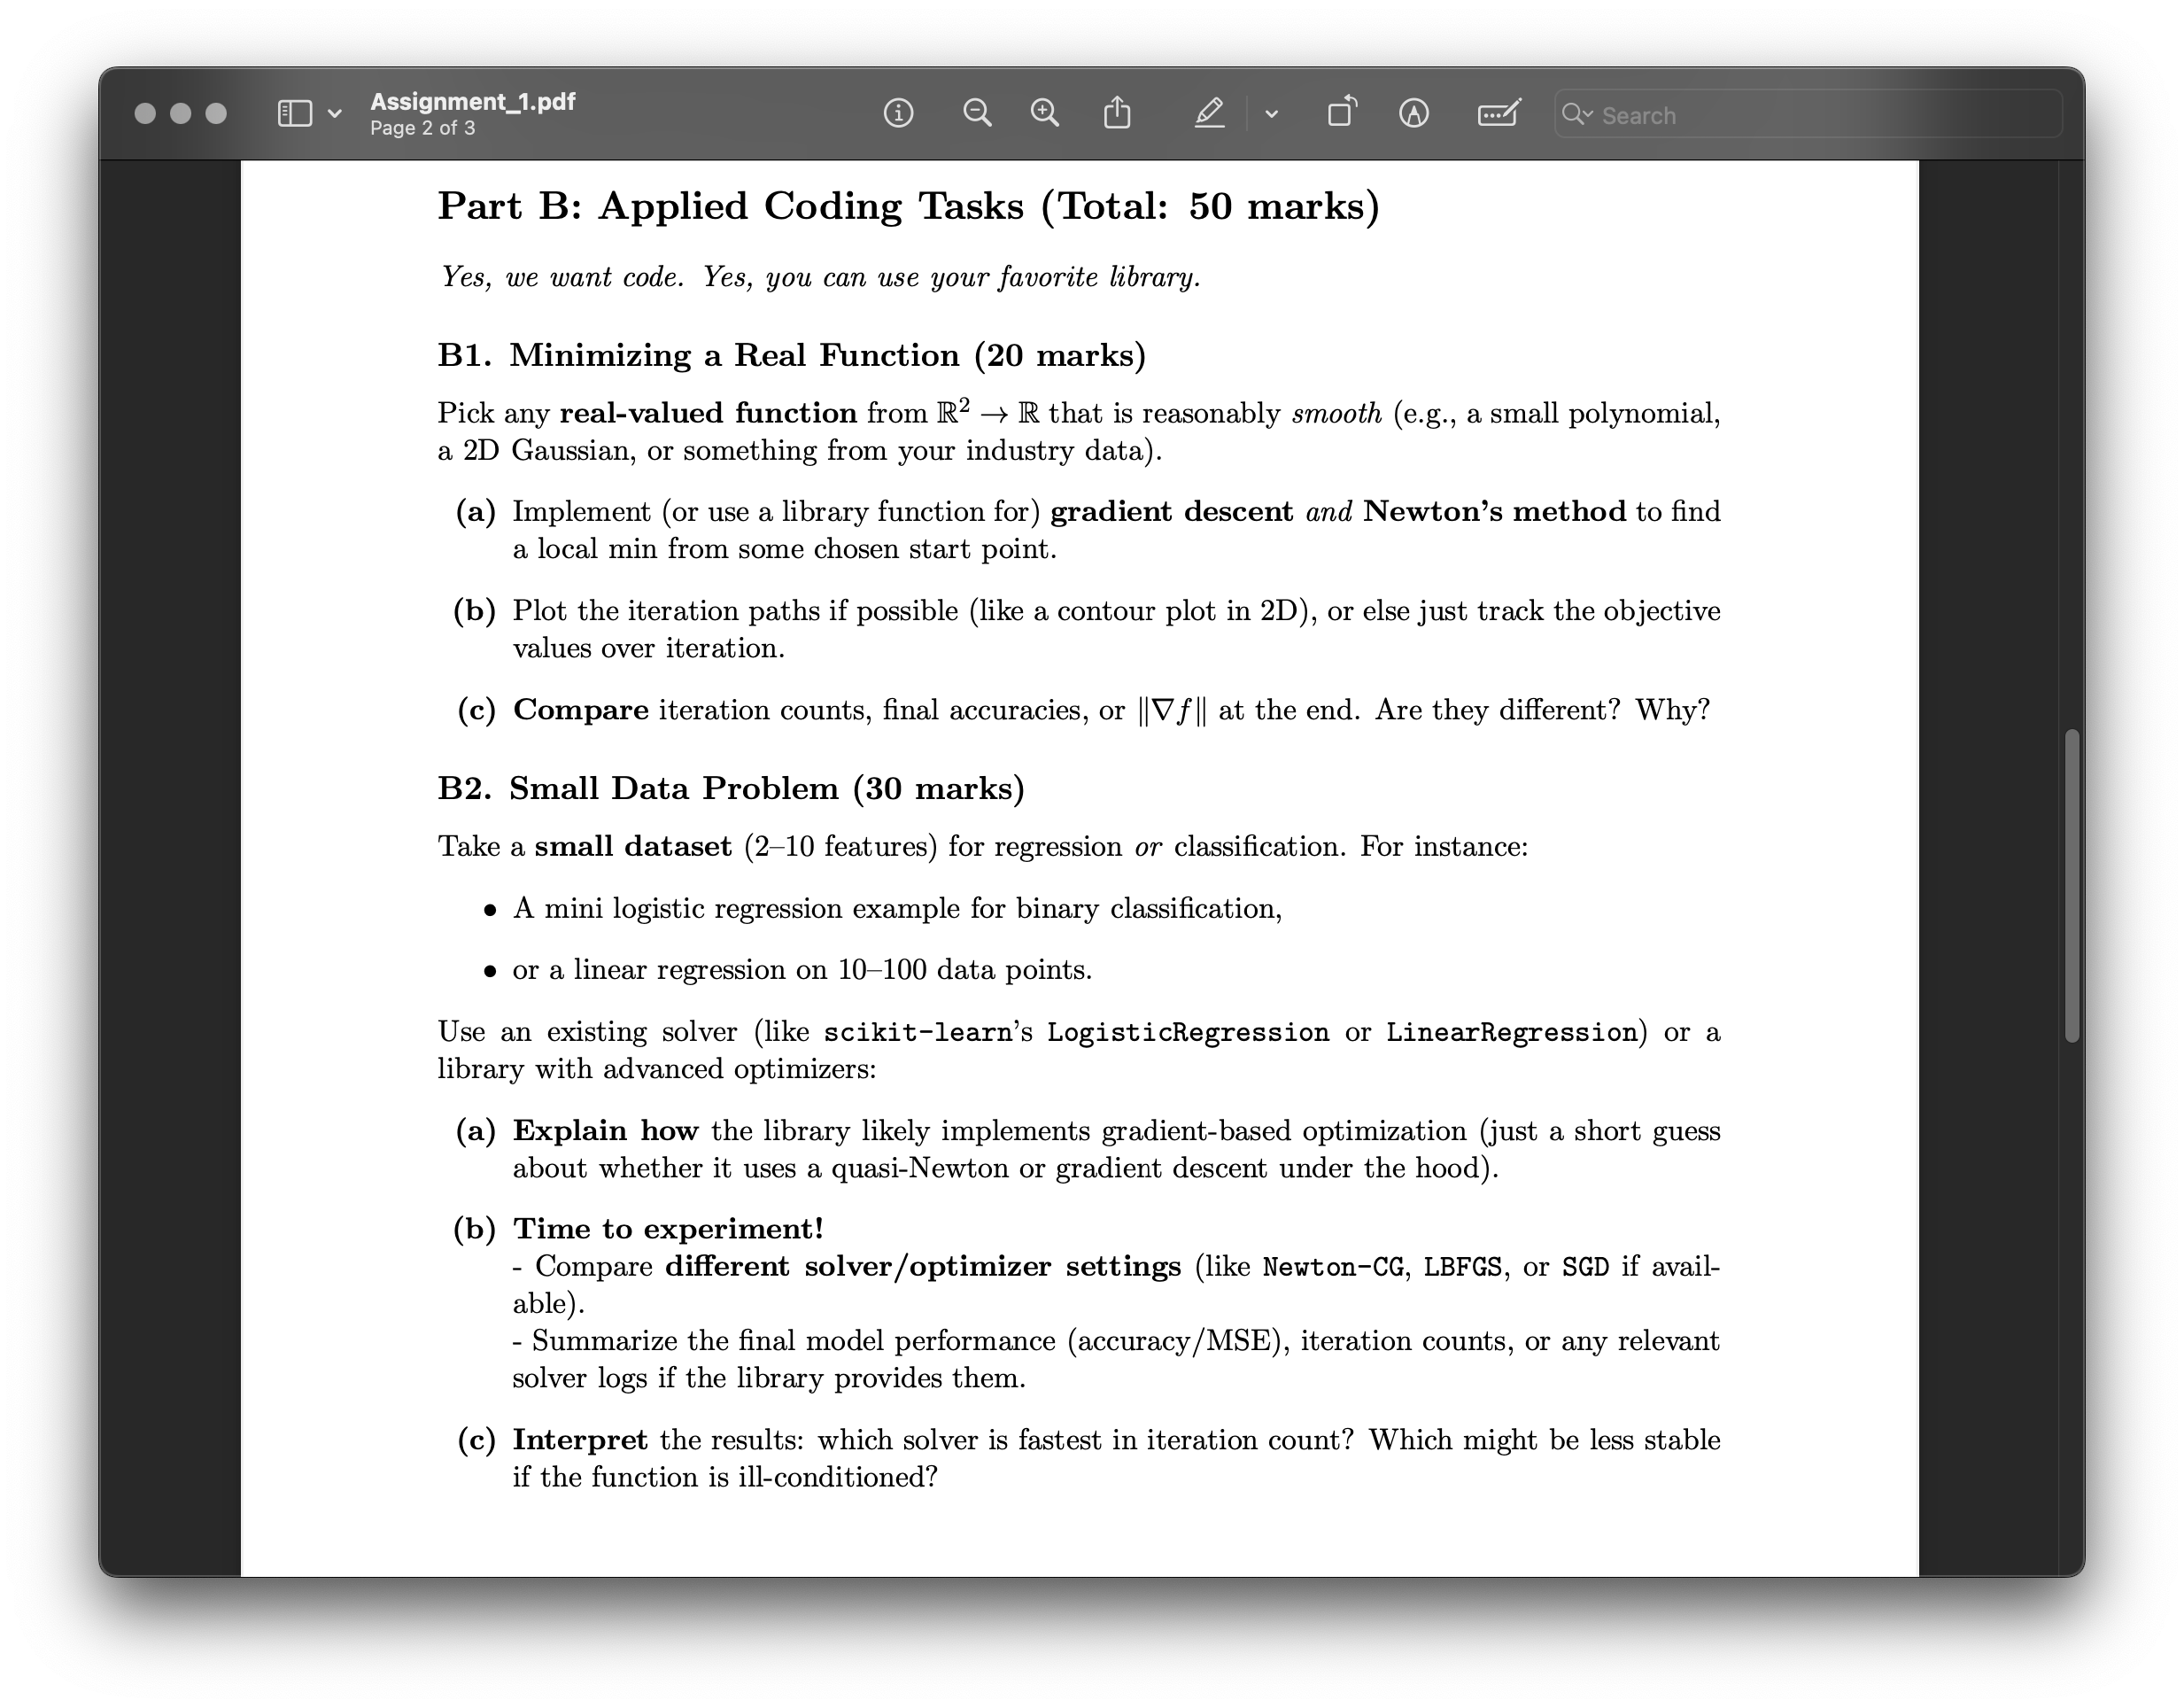

## B1. Minimising the Real function

Selecting Real function from R^2 → R as:<br>
f(x0, x1) = (1 - x0)^2 + 100(x1 - x0^2)^2

In [135]:
# Importing libraries
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [136]:
# Function definition:
def f(x, y):
    return (1-x)**2 + 100*((y - x**2)**2)

In [137]:
# Gradient function definition:
def grad(x, y):
    return np.array([2*(x-1) - 400*x*(y-x**2), 200*(y-x**2)])

# Hessian function definition:
def hg(x, y):
    return np.array([[2-400*y+1200*x**2, -400*x], [-400*x, 200]])

In [138]:
# Initial point:
start_point = (-1.4, 1.0)
learning_rate = 0.001
max_iterations = 10000

In [139]:
# Gradient Descent:
def gd(start_point, learning_rate, max_iter):
    x, y = start_point
    path = [(x, y)]
    for i in range(max_iter):
        if np.linalg.norm(grad(x, y)) < 1e-6:       # 1e-6: Hyperparameter - tolerance
            break
        x, y = x - learning_rate*grad(x, y)[0], y - learning_rate*grad(x, y)[1]
        path.append([x, y])
    return np.array(path)

# Newton's Method:
def newton(start_point, max_iter):
    x, y = start_point
    path = [(x, y)]
    for i in range(max_iter):
        if np.linalg.norm(grad(x, y)) < 1e-6:       # 1e-6: Hyperparameter - tolerance
            break
        hessian = hg(x, y)
        step = np.linalg.solve(hessian, grad(x, y))
        x, y = np.array([x, y]) - step
        path.append((x, y))
    return np.array(path)

In [140]:
# Run both methods:

gd_res = gd(start_point, learning_rate, max_iterations)
newton_res = newton(start_point, max_iterations)

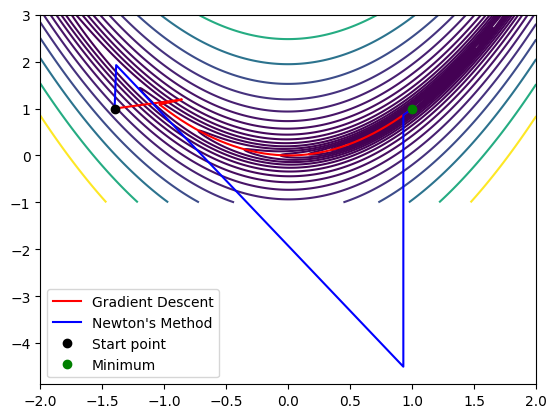

In [141]:
# Plotting for the iteration paths:
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels=np.logspace(-1, 3, 20))
ax.plot(*zip(*gd_res), 'r-', label='Gradient Descent')
ax.plot(*zip(*newton_res), 'b-', label="Newton's Method")
ax.plot(*start_point, 'o', color='black', label='Start point')
ax.plot(1, 1, 'go', label='Minimum')
ax.legend()

plt.show()

In [142]:
# Comparison of Gradient Descent and Newton's Method
# - Iteration counts

print(f'Gradient Descent: {len(gd_res)} iterations')
print(f"Newton's Method: {len(newton_res)} iterations\n")

# - Final points
final_gd = f(gd_res[-1][0], gd_res[-1][1])
final_nm = f(newton_res[-1][0], newton_res[-1][1])

print(f'Gradient Descent: {final_gd}')
print(f"Newton's Method: {final_nm}\n")

# - Norm values
norm_gd = np.linalg.norm(grad(gd_res[-1][0], gd_res[-1][1]))
norm_nm = np.linalg.norm(grad(newton_res[-1][0], newton_res[-1][1]))

print(f'Gradient Descent: {norm_gd}')
print(f"Newton's Method: {norm_nm}")

Gradient Descent: 10001 iterations
Newton's Method: 6 iterations

Gradient Descent: 5.920590489221786e-05
Newton's Method: 1.038274996401847e-15

Gradient Descent: 0.006919175678034226
Newton's Method: 6.444419442556229e-08


### Conclusion:

Yes, Regular gradient descent and Newton's method are different.


## B2: Small data problems

Initial guess for underhood method: <br>
- The default implementation or library implementation according to me would not be using gradient descent as in the base format, as it would be very inefficient method in practice.
- Rather than that it would be using some Heuristic or other variants of GD: like, Method in the ```family``` of ```Quasi Newton``` method, ```Stochastic gradient descent```, etc.

Using following dataset:
- ```Iris dataset``` for classification
- ```Diabetes dataset``` for regression

In [143]:
# Library imports

import numpy as np
from sklearn.datasets import load_iris, load_diabetes
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

### Logistic regression - Iris dataset

In [144]:
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

In [145]:
# Use only two classes for binary classification
X_iris_binary = X_iris[y_iris != 2]
y_iris_binary = y_iris[y_iris != 2]

In [146]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_iris_binary, y_iris_binary, test_size=0.3, random_state=42)

In [147]:
# Compare solvers for Logistic Regression
solvers = ['lbfgs', 'newton-cg', 'saga']
for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    iterations = model.n_iter_[0]  # Accessing the number of iterations
    print(f"Solver: {solver}, Accuracy: {accuracy:.2f}, Iterations: {iterations}")

Solver: lbfgs, Accuracy: 1.00, Iterations: 26
Solver: newton-cg, Accuracy: 1.00, Iterations: 7
Solver: saga, Accuracy: 1.00, Iterations: 1000


/Users/vedantjoshi/Documents/Python journey/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Linear Regression - Diabetes dataset

In [148]:
diabetes = load_diabetes()
X_diabetes, y_diabetes = diabetes.data[:100], diabetes.target[:100]

In [149]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, test_size=0.3, random_state=42)

In [150]:
# Ordinary Least Squares (OLS) Linear Regression
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
y_pred_ols = ols_model.predict(X_test)
mse_ols = mean_squared_error(y_test, y_pred_ols)
print(f"OLS Linear Regression MSE: {mse_ols:.4f}")

OLS Linear Regression MSE: 2523.6634


In [ ]:
# Ridge Regression with SAGA solver
ridge_model = Ridge(alpha=1.0, solver='saga', max_iter=1000)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
ridge_iter = ridge_model.n_iter_[0]
print(f"Ridge Regression (SAGA Solver) MSE: {mse_ridge:.4f}, Iterations: {ridge_iter}")

Ridge Regression (SAGA Solver) MSE: 3407.5817, Iterations: 13


### Conclusion

| Task                 | Solver       | Metric            | Iterations | Comments                                                 |
|----------------------|--------------|-------------------|------------|----------------------------------------------------------|
| Logistic Regression  | `lbfgs`      | Accuracy: ~100%   | ~26        | Fast convergence, stable for small datasets.            |
| Logistic Regression  | `newton-cg`  | Accuracy: ~100%   | ~7         | Slightly faster in iteration count but computationally more expensive. |
| Logistic Regression  | `saga`       | Accuracy: ~100%   | ~1000      | Slower but supports sparse data and large-scale problems.|
| Linear Regression    | `OLS`        | MSE: 2523.67      | N/A        | Closed-form solution; no iterations required.           |
| Ridge Regression     | `saga`       | MSE: 3407.59      | ~13        | Gradient-based; slower but handles regularization effectively. |


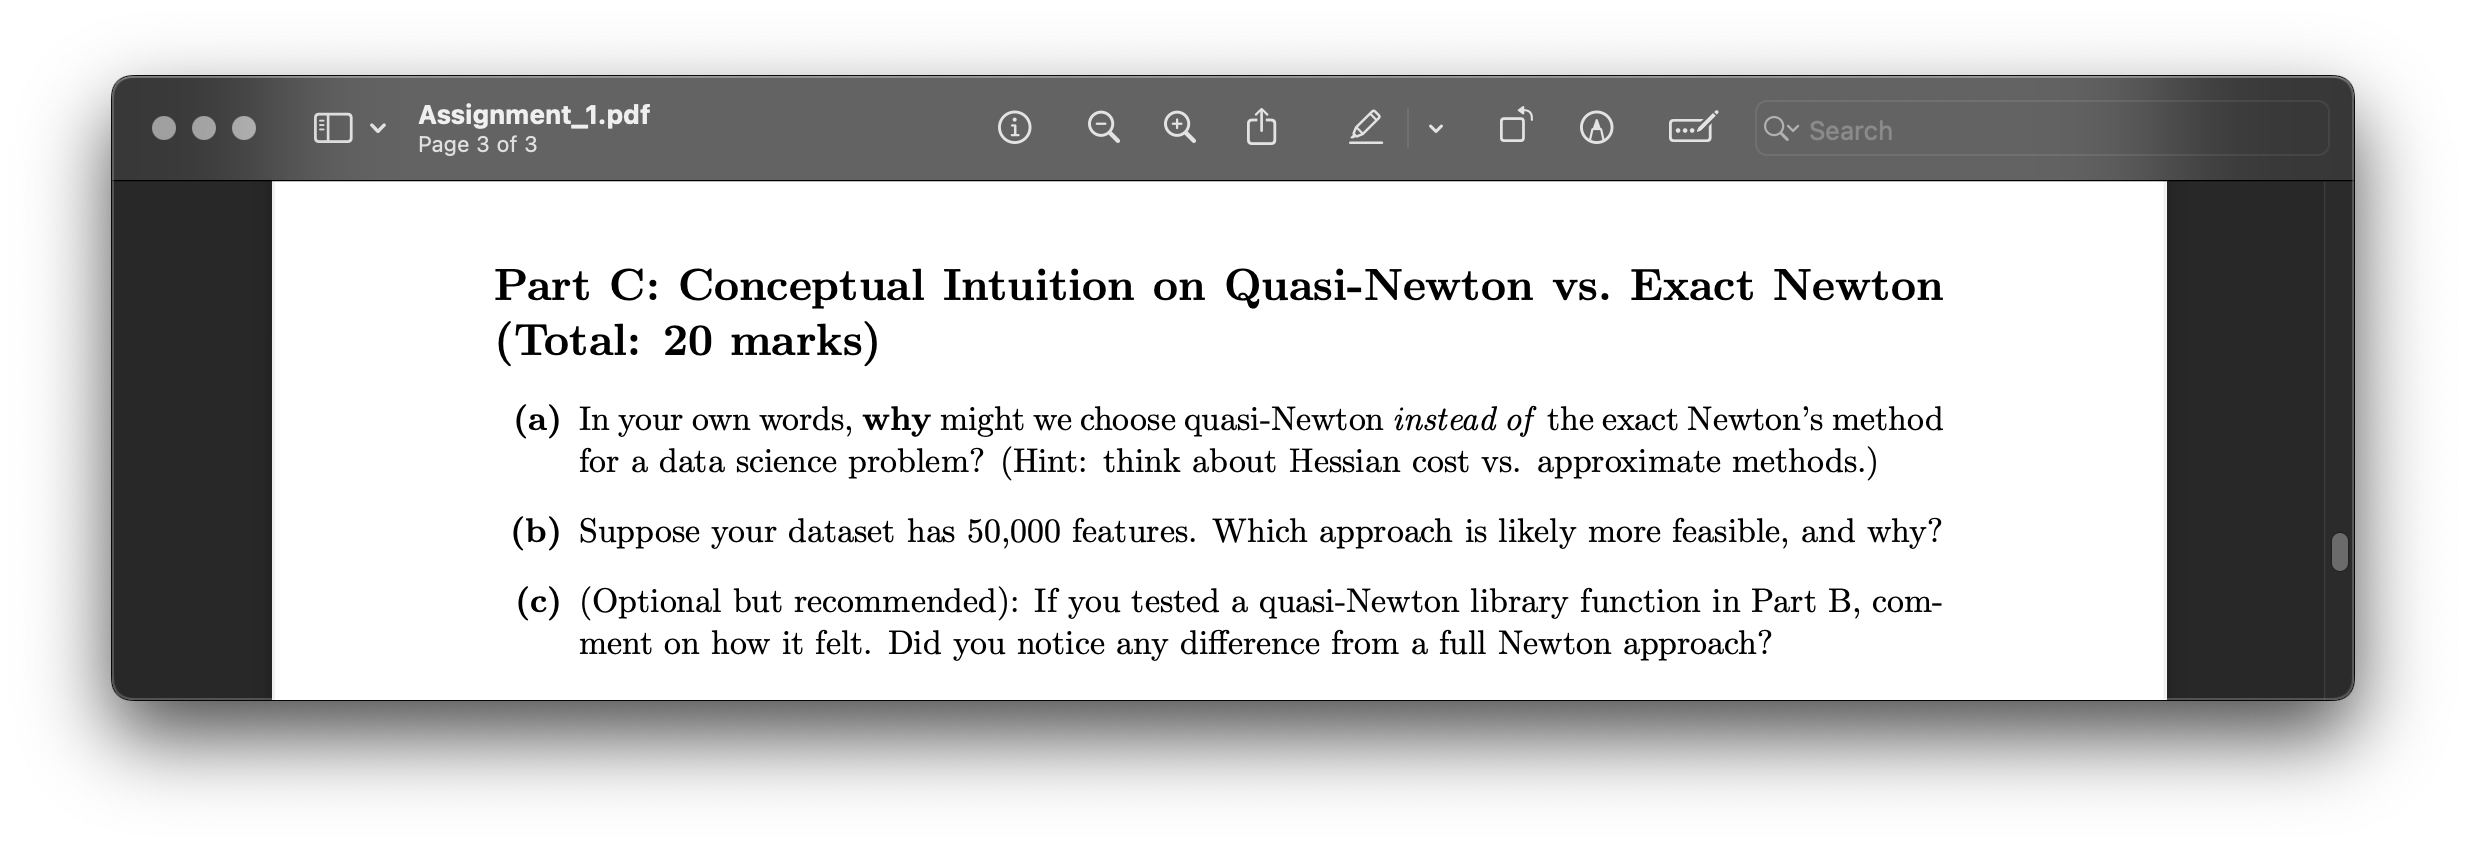

[Part C](../../../Downloads/ODSM_Part_C.pdf)